In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

In [2]:
# read data
active_users = pd.read_csv('C:/Users/under/Desktop/karpov_courses/final_project/Проект_4_active_users.csv')
groups = pd.read_csv('C:/Users/under/Desktop/karpov_courses/final_project/Проект_4_groups.csv')
purchases = pd.read_csv('C:/Users/under/Desktop/karpov_courses/final_project/Проект_4_purchases.csv')

#### Exploratory analysis

In [3]:
active_users.head()

,user_id,country,platform,sex
0,8029,Russia,ios,male
1,1735,Sweden,ios,male
2,7697,Russia,android,male
3,1421,Sweden,android,female
4,1704,Russia,ios,male


In [4]:
groups.head()

,user_id,group
0,9149,B
1,9150,B
2,9151,A
3,9152,B
4,9153,B


In [5]:
purchases.head()

,user_id,revenue
0,4412,1000.0
1,9000,701.0
2,9001,700.0
3,9002,702.0
4,5790,1002.0


In [6]:
# имеем 8341 активного в период а/б теста клиента. Разделены по полу стране, полу и платформе.
active_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8341 entries, 0 to 8340
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   8341 non-null   int64 
 1   country   8341 non-null   object
 2   platform  8341 non-null   object
 3   sex       8341 non-null   object
dtypes: int64(1), object(3)
memory usage: 260.8+ KB


In [7]:
groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74576 entries, 0 to 74575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  74576 non-null  int64 
 1   group    74576 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [8]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  541 non-null    int64  
 1   revenue  541 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.6 KB


In [9]:
groups.groupby('group').agg({'user_id':'count'})

,user_id
group,
A,14693
B,59883


In [10]:
active_users.groupby('country').agg({'user_id':'count'})

,user_id
country,
Russia,5407
Sweden,2934


In [11]:
active_users.groupby('platform').agg({'user_id':'count'})

,user_id
platform,
android,4621
ios,3720


In [12]:
active_users.groupby('sex').agg({'user_id':'count'})

,user_id
sex,
female,4145
male,4196


In [13]:
purchases_by_group = purchases.merge(groups, on='user_id', how='left')

In [14]:
purchases_by_group

,user_id,revenue,group
0,4412,1000.0,A
1,9000,701.0,B
2,9001,700.0,B
3,9002,702.0,B
4,5790,1002.0,B
...,...,...,...
536,5648,1908.0,B
537,2277,1912.0,B
538,5032,1911.0,B
539,908,1910.0,B


In [15]:
# всем пользователям, совершившим покупку присвоена группа
purchases_by_group.group.isna().value_counts()

False    541
Name: group, dtype: int64

In [16]:
# соотношение контрольной и тестовой группы сохраняется
purchases_by_group.groupby('group').agg({'user_id':'count'})

,user_id
group,
A,107
B,434


#### Что мы имеем: 
- 74576 клиентов, разбитых на контрольную и тестовую группу в соотношении ~25/75. Соотношение странное. Можно предположить, что команда была настолько уверена в изменениях, которые она вносит, что решила увеличить тестовую группу до такого объема.
- 8341 клиента, которые пользовались приложением в период проведения теста.
- 541 клиента, которые совершили покупку в период проведения теста. Из них 107 - контрольная группа, 434 - тестовая.

___

<AxesSubplot:xlabel='group', ylabel='revenue'>

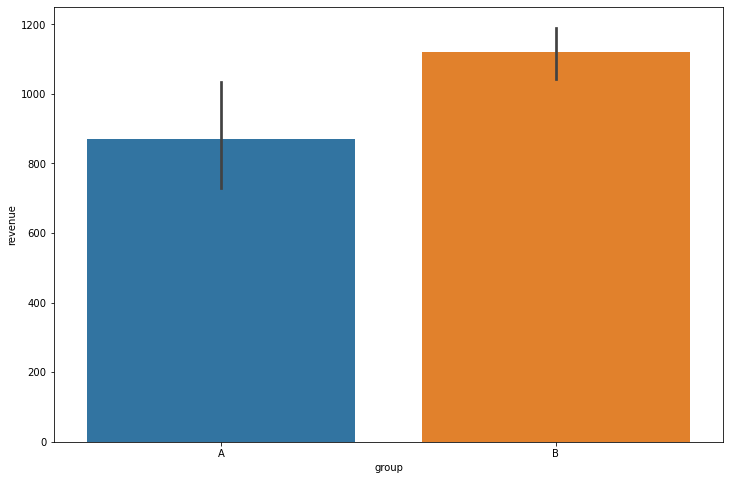

In [17]:
sns.barplot(x='group', y='revenue', data=purchases_by_group, estimator=np.mean)

<AxesSubplot:xlabel='group', ylabel='revenue'>

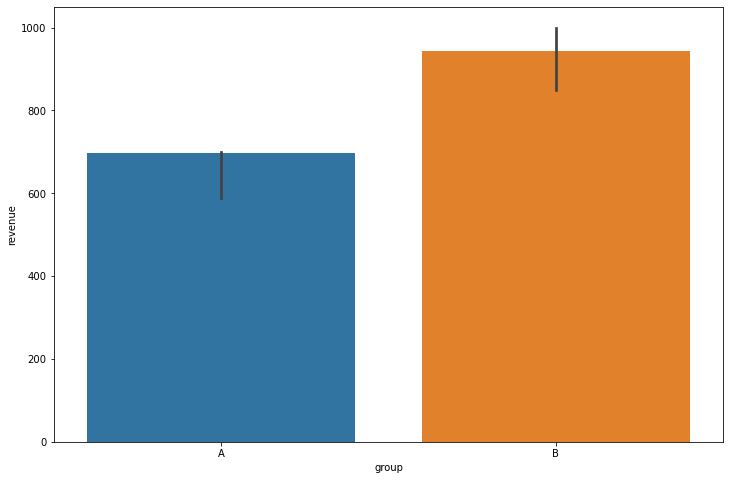

In [18]:
sns.barplot(x='group', y='revenue', data=purchases_by_group, estimator=np.median)

На первый взгляд можно сказать, что пользователи из тестовой группы в среднем платили больше, чем из контрольной.

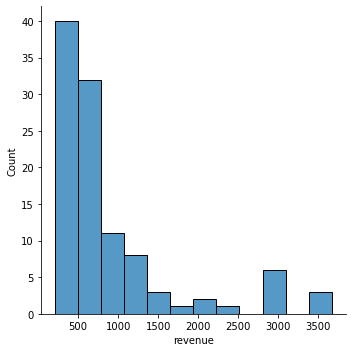

In [19]:
sns.displot(purchases_by_group.query('group == "A"').revenue)

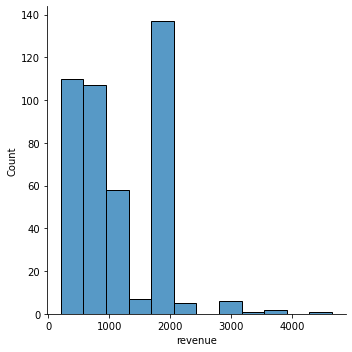

In [20]:
sns.displot(purchases_by_group.query('group == "B"').revenue)

На графиках можно увидеть большой спайк чеков на ~2000 и уменьшение количества крупных чеков ~3000-3500 среди пользователей из тестовой группы.

In [21]:
# посмотрим на платящих пользователей более подробно
paying_users = purchases_by_group.merge(active_users, on='user_id', how='left')

In [22]:
paying_users

,user_id,revenue,group,country,platform,sex
0,4412,1000.0,A,Russia,android,female
1,9000,701.0,B,NaN,NaN,NaN
2,9001,700.0,B,NaN,NaN,NaN
3,9002,702.0,B,NaN,NaN,NaN
4,5790,1002.0,B,Sweden,android,male
...,...,...,...,...,...,...
536,5648,1908.0,B,Sweden,android,female
537,2277,1912.0,B,Sweden,ios,female
538,5032,1911.0,B,Sweden,ios,male
539,908,1910.0,B,Sweden,android,male


In [23]:
paying_users.country.isna().value_counts()

False    392
True     149
Name: country, dtype: int64

Имеем 149 пользователей, совершивших покупку, но не проявивших активность в период теста. Возможно это плановое автоматическое списание платы за подписку.  
Так как им присвоена группа и у нас не так много наблюдений - исключать их пока нет смысла.

In [24]:
# Женщины стали платить больше, чем мужчины. Тестовая группа в среднем показывает себя лучше.
paying_users.groupby(['group', 'sex']).agg({'revenue':'mean'})

revenue
group sex                
A     female   856.945946
      male    1021.731707
B     female  1370.220779
      male    1169.368750

In [25]:
# Пользователи на iOs в тестовой группе обогнали андроид. Тестовая группа в среднем показывает себя лучше.
paying_users.groupby(['group', 'platform']).agg({'revenue':'mean'})

revenue
group platform             
A     android   1023.025641
      ios        864.102564
B     android   1232.437870
      ios       1309.179310

In [26]:
# Пользователи из Швеции платят больше, чем из России. Тестовая группа в среднем показывает себя лучше.
paying_users.groupby(['group', 'country']).agg({'revenue':'mean'})

revenue
group country             
A     Russia    823.418605
      Sweden   1091.171429
B     Russia   1215.441624
      Sweden   1356.162393

____

#### Стоит сразу выделить основные метрики, которые мы будем сравнивать
Основными целевыми метриками в нашем случае являются - конверсия в покупку, средний чек, ARPU, ARPPU. Отбрасываем средний чек, так как основная денежная фича в наших датасетах это revenue(доход).  
Остаются:
- конверсия в покупку 
- ARPU (средний доход на пользователя)  
- ARPPU (средний доход на платящего пользователя)  
Предварительно взглянем на них

In [27]:
# схлопнем датафрейм с активными пользователями с groups
active_users_by_group = active_users.merge(groups, on='user_id', how='left')

In [28]:
active_users_by_group

,user_id,country,platform,sex,group
0,8029,Russia,ios,male,B
1,1735,Sweden,ios,male,B
2,7697,Russia,android,male,B
3,1421,Sweden,android,female,B
4,1704,Russia,ios,male,B
...,...,...,...,...,...
8336,2417,Sweden,ios,female,B
8337,3755,Russia,ios,male,A
8338,4594,Sweden,android,female,B
8339,7430,Sweden,ios,female,B


In [29]:
# всем юзерам присвоена группа
active_users_by_group.group.isna().value_counts()

False    8341
Name: group, dtype: int64

In [30]:
# соотношение групп
active_users_by_group.groupby('group').agg({'user_id':'count'})

,user_id
group,
A,1538
B,6803


In [31]:
# схлопнем в один датафрейм данные об активных пользователях, их покупках и группе 
active_users_by_group_purchase = active_users.merge(purchases, on='user_id', how='outer')

active_users_by_group_purchase = active_users_by_group_purchase.merge(groups, on='user_id', how='left')

In [32]:
active_users_by_group_purchase

,user_id,country,platform,sex,revenue,group
0,8029,Russia,ios,male,NaN,B
1,1735,Sweden,ios,male,NaN,B
2,7697,Russia,android,male,NaN,B
3,1421,Sweden,android,female,NaN,B
4,1704,Russia,ios,male,NaN,B
...,...,...,...,...,...,...
8485,9144,NaN,NaN,NaN,209.0,B
8486,9145,NaN,NaN,NaN,301.0,B
8487,9146,NaN,NaN,NaN,207.0,B
8488,9147,NaN,NaN,NaN,408.0,B


In [33]:
# заменяем пропущенные значения в колонке purchase на 0
active_users_by_group_purchase.revenue = active_users_by_group_purchase.revenue.fillna(0)

In [34]:
# 541 пользователь, совершивший покупку, все корректно
active_users_by_group_purchase.query('revenue > 0')

,user_id,country,platform,sex,revenue,group
45,1202,Sweden,android,male,302.0,A
58,6284,Russia,android,female,208.0,B
63,6554,Sweden,android,female,602.0,B
101,6000,Sweden,ios,male,1910.0,B
117,4046,Sweden,ios,female,1909.0,B
...,...,...,...,...,...,...
8485,9144,NaN,NaN,NaN,209.0,B
8486,9145,NaN,NaN,NaN,301.0,B
8487,9146,NaN,NaN,NaN,207.0,B
8488,9147,NaN,NaN,NaN,408.0,B


In [35]:
# ARPU (средний доход на пользователя)
active_users_by_group_purchase.groupby('group').agg({'revenue':'mean'})

,revenue
group,
A,59.452457
B,70.139390


In [36]:
# ARPPU (средний доход на платящего пользователя)
# В качестве меры центральной тенденции для данной метрики я буду использовать медиану - она сгладит влияние выбросов 
# в небольшой контрольной выборке и будет более объективной мерой для распределния Пуассоновского вида
active_users_by_group_purchase.query('revenue > 0').groupby('group').agg({'revenue':'median'})

,revenue
group,
A,698.0
B,944.0


In [37]:
# добавим колонку paying чтобы выделить платящих пользователей
active_users_by_group_purchase['paying'] = (active_users_by_group_purchase.revenue > 0).astype(int)

In [38]:
to_pivot = active_users_by_group_purchase.groupby(['group', 'paying'], as_index=False).agg({'user_id':'count'})

pivoted_converse = to_pivot.pivot(index='group', columns='paying', values='user_id')

pivoted_converse['users_count'] = pivoted_converse[0] + pivoted_converse[1]
pivoted_converse['CR'] = pivoted_converse[1] / pivoted_converse.users_count

In [39]:
# CR
# конверсия в платящего пользователя у тестовой группы ниже
pivoted_converse

paying,0,1,users_count,CR
group,,,,
A,1460,107,1567,0.068283
B,6489,434,6923,0.062690


ARPU и ARPPU выше в тестовой группе.  
Конверсия в покупку немного выше в контрольной группе.

___

В качестве инструмента проверки гипотезы о равенстве средних я буду использовать бутстрап.
Критерий Манна-Уитни также можно использовать, но он сильно теряет в мощности на несбалансированных выборках.

Уровень значимости стандартный - 0.05.

#### Проверяем ARPPU

In [40]:
# разбиваем датасет на тестовый и контрольный
test_df    = pd.DataFrame(active_users_by_group_purchase.query('group == "B" and revenue > 0').revenue)
control_df = pd.DataFrame(active_users_by_group_purchase.query('group == "A" and revenue > 0').revenue)

In [41]:
from scipy.stats import norm, mannwhitneyu
from tqdm import tqdm

In [42]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = min([len(data_column_1), len(data_column_2)]) # выбираем минимальный размер выборки(контрольной) 
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
    #for i in range(boot_it):
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) # mean()/median() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=1000,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

100%|██████████| 10000/10000 [00:02<00:00, 3498.08it/s]


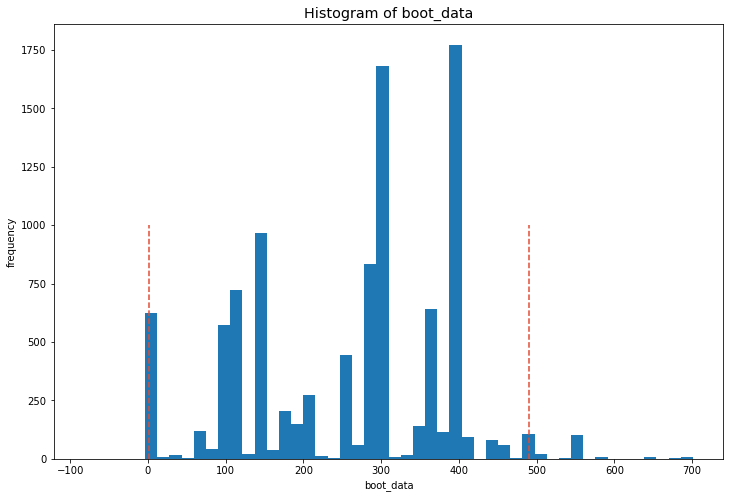

In [43]:
booted_data = get_bootstrap(test_df, control_df, boot_it=10000, statistic=np.median)

In [44]:
booted_data['p_value']

0.04828468330286763

In [45]:
booted_data['ci']

,0
0.025,1.0
0.975,490.0


Значение p-value ходит вокруг значения 0.05.
Стоит проверить, как часто модель выдает нам значения выше и ниже выбранного уровня значимости.

In [46]:
def get_bootstrap_0(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = min([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in range(boot_it): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2))
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

In [47]:
def check_p_val(df1, df2, boot_it=500, statistic=np.median):
    l = []
    for i in range(100):
        l.append(get_bootstrap_0(df1, df2, boot_it, statistic)['p_value'])
    l = pd.DataFrame(l).reset_index()
    sns.lineplot(y=0, x='index', data=l)
    # В скольки случаях из 100 мы получаем p-value ниже порогового:
    print((l[0] < 0.05).value_counts()[1], 'p-value ниже 0.05 из 100')

63 p-value ниже 0.05 из 100


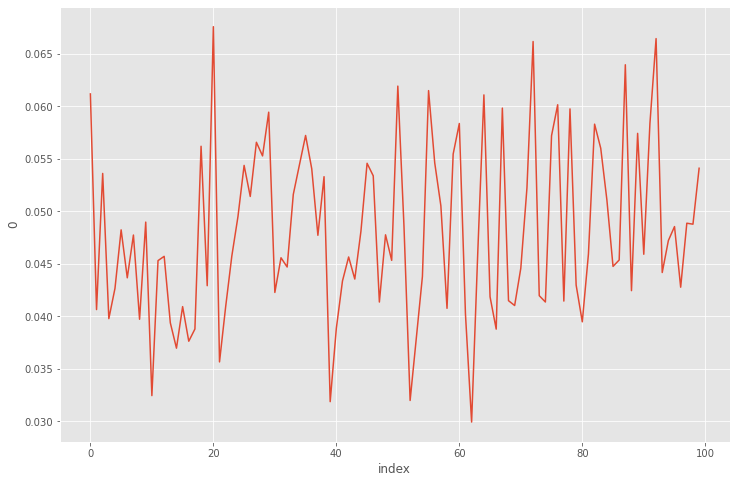

In [48]:
check_p_val(test_df, control_df)

При данных результатах мы отклоняем альтернативную гипотезу, так как вероятность совершения ошибки первого рода достаточна высока(~40-60%, общепринятый порог - 80%). Этот факт не позволяет нам качественно задетектировать различия между тестовой и контрольной группой.

In [49]:
import pingouin as pg
from scipy import stats

In [50]:
mu = 870.672897
sigma = 815.876190
pvals_df = pd.DataFrame()
pvals_tt_df = pd.DataFrame()
for j in tqdm(range(1, 51)):
    p_vals = []
    p_vals_tt = []
    for i in range(1000):
        s = np.random.normal(mu, sigma, 107)
        s2 = np.random.normal(mu, sigma, 434)
        p_vals.append(pg.mwu(s, s2*(1+j/100), alternative='two-sided')['p-val'][0])
        p_vals_tt.append(stats.ttest_ind(s, s2*(1+j/100))[1])
    col_name = [j/100]  
    
    p_vals = pd.DataFrame(p_vals, columns=col_name)
    p_vals = (p_vals < 0.05).value_counts()[1] / 1000
    p_vals = pd.DataFrame([[col_name[0], p_vals]])
    pvals_df = pd.concat([pvals_df, p_vals], axis=0)
    
    p_vals_tt = pd.DataFrame(p_vals_tt, columns=col_name)
    p_vals_tt = (p_vals_tt < 0.05).value_counts()[1] / 1000
    p_vals_tt = pd.DataFrame([[col_name[0], p_vals_tt]])
    pvals_tt_df = pd.concat([pvals_tt_df, p_vals_tt], axis=0)

100%|██████████| 50/50 [01:23<00:00,  1.67s/it]


In [51]:
pvals_df.rename(columns={0:'diff', 1:'p_value_ratio'}, inplace=True)
pvals_df.reset_index(inplace=True)
pvals_df.drop(columns=['index'], inplace=True)

pvals_tt_df.rename(columns={0:'diff', 1:'p_value_ratio'}, inplace=True)
pvals_tt_df.reset_index(inplace=True)
pvals_tt_df.drop(columns=['index'], inplace=True)

<AxesSubplot:xlabel='diff', ylabel='p_value_ratio'>

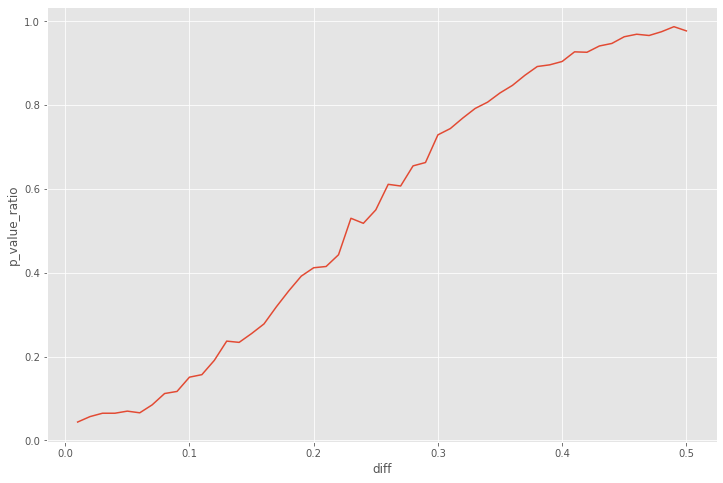

In [52]:
sns.lineplot(x='diff', y='p_value_ratio', data=pvals_df)

<AxesSubplot:xlabel='diff', ylabel='p_value_ratio'>

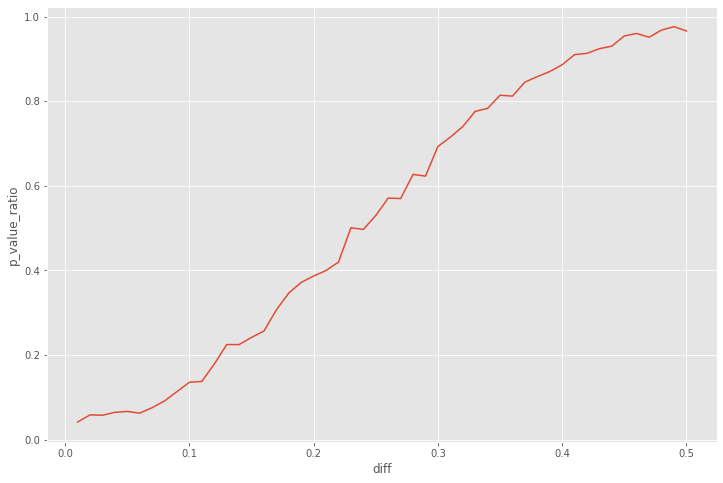

In [53]:
sns.lineplot(x='diff', y='p_value_ratio', data=pvals_tt_df)

По результатам синтетического теста можно сказать, что при параметрах распределения идентичных нашей контрольной выборке, Т-тест и критерий Манна-Уитни начинают качественно детектировать(> 80% случаев) различия между группами только когда они превышают ~35% и ~33% соответственно. У нас есть различия в ~25% которые при данном объеме выборки детектируются некачественно.  
Для получения более стабильных результатов можно увеличить размер выборок продлить длительность теста или сбалансировав соотношение контрольной и тестовой группы.

При увеличении объема выборки до 500 наблюдений - мощность теста значительно увеличивается.
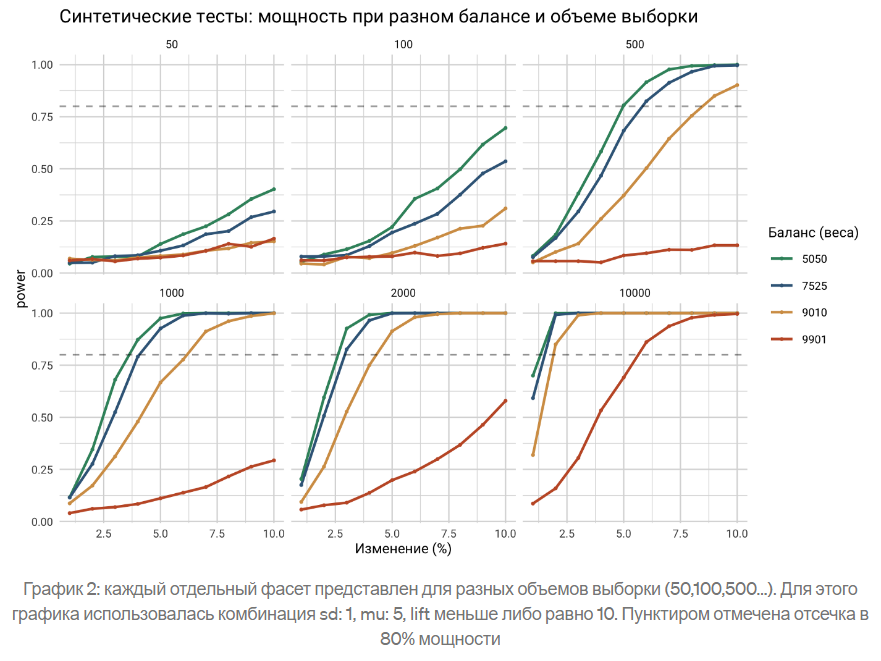
Спасибо Искандеру!
https://medium.com/statistics-experiments/%D0%B4%D0%B8%D1%81%D0%B1%D0%B0%D0%BB%D0%B0%D0%BD%D1%81-%D0%B2-a-b-%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%85-%D0%B5%D1%81%D1%82%D1%8C-%D0%BB%D0%B8-%D1%80%D0%B0%D0%B7%D0%BD%D0%B8%D1%86%D0%B0-%D0%BC%D0%B5%D0%B6%D0%B4%D1%83-99-1-%D0%B8-50-50-%D0%B2-%D1%8D%D0%BA%D1%81%D0%BF%D0%B5%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D1%82%D0%B0%D1%85-11c8f4fe7eb4

#### Проверяем ARPU  

В качестве меры центральной тенденции для ARPU и CR(ниже) мы будем использовать среднее арифметическое, так как в обоих этих случаях медиана равна 0.

In [54]:
test_df    = pd.DataFrame(active_users_by_group_purchase.query('group == "B"').revenue)
control_df = pd.DataFrame(active_users_by_group_purchase.query('group == "A"').revenue)

100%|██████████| 10000/10000 [00:02<00:00, 3714.00it/s]


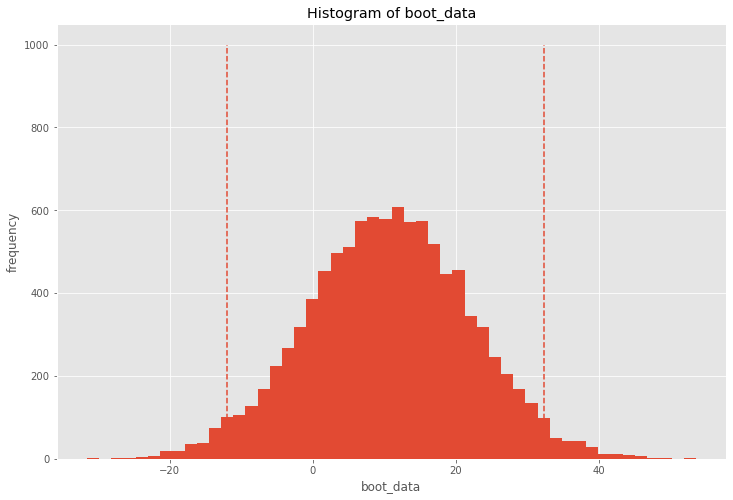

In [55]:
booted_data = get_bootstrap(test_df, control_df, boot_it=10000)

In [56]:
booted_data['p_value']

0.34692419812060993

In [57]:
booted_data['ci']

,0
0.025,-12.014183
0.975,32.340954


p-value значительно выше порогового 0.05, оставляем нулевую гипотезу, отклоняем альтернативную.

#### Проверяем Conversion Rate

In [58]:
test_df    = pd.DataFrame(active_users_by_group_purchase.query('group == "B"').paying)
control_df = pd.DataFrame(active_users_by_group_purchase.query('group == "A"').paying)

100%|██████████| 10000/10000 [00:02<00:00, 3378.03it/s]


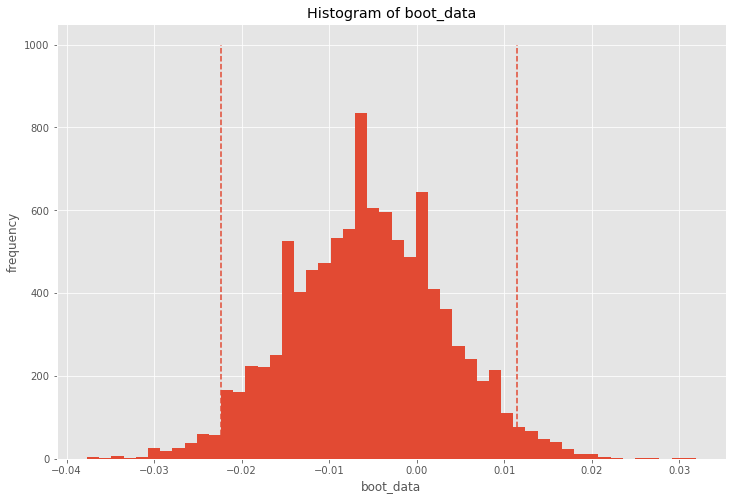

In [59]:
booted_data = get_bootstrap(test_df, control_df, boot_it=10000)

In [60]:
booted_data['p_value']

0.525436168216536

In [61]:
booted_data['ci']

,0
0.025,-0.022336
0.975,0.011487


p-value также значительно выше порогового 0.05, оставляем нулевую гипотезу, отклоняем альтернативную.

___

Также мной было проверены гипотезы о различиях в ARPPU между группами, разделенными по полу, платформе и стране.  
Дабы не захламлять ноутбук - статистически значимые различия найдены только для пользователей женского пола.  
Реализация ниже.
В ARPU между теми же группами значимых различий не было найдено.
В CR между теми же группами также значимых различий не было найдено.

In [62]:
control_df = active_users_by_group_purchase.query('group == "A" and revenue > 0 and sex == "female"').revenue
test_df    = active_users_by_group_purchase.query('group == "B" and revenue > 0 and sex == "female"').revenue

100%|██████████| 10000/10000 [00:01<00:00, 5644.75it/s]


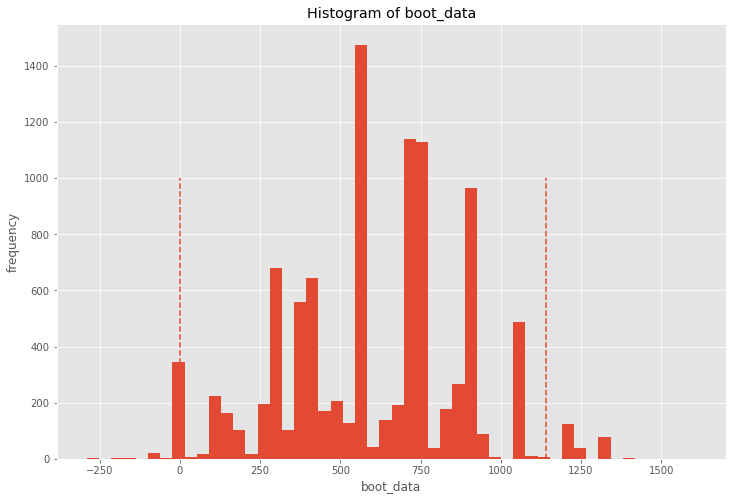

In [63]:
booted_data = get_bootstrap(test_df, control_df, boot_it=10000, statistic=np.median)

In [64]:
booted_data['p_value']

0.03335457199605255

98 p-value ниже 0.05 из 100


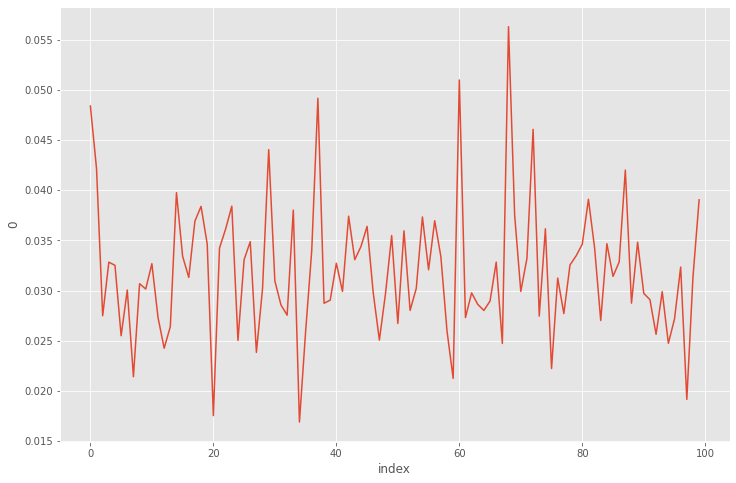

In [65]:
check_p_val(test_df, control_df)

Несмотря на небольшой объем контрольной выборки, мы качественно детектируем различия между группами.  
Для данного сегмемнта пользователей мы можем отклонить нулевую гипотезу о равенстве средних. Вероятность встретить такие или более ярко выраженные различия ~0.035.

### Выводы:
На основании проведенного анализа мы получили статистически значимые различия между тестовой и контрольной группой только для пользователей женского пола. В новой модели женщины в среднем стали платить больше.
Однако необходимо отметить несбалансированность и малый объем выборки. Тот факт, что в целом и в разбивке по группам не было найдено значимых различий не означает, что их нет. При сравнении ARPUU всех пользователей мы столкнулись со слабой мощностью теста. Наиболее правильным решением будет увеличить длительность теста и балансирование выборок для увеличения количества наблюдений в обоих группах.

___